Assignment2

Neural Networks

In [32]:
import numpy as np
import sympy as sp
sp.init_printing()

# mindmap:

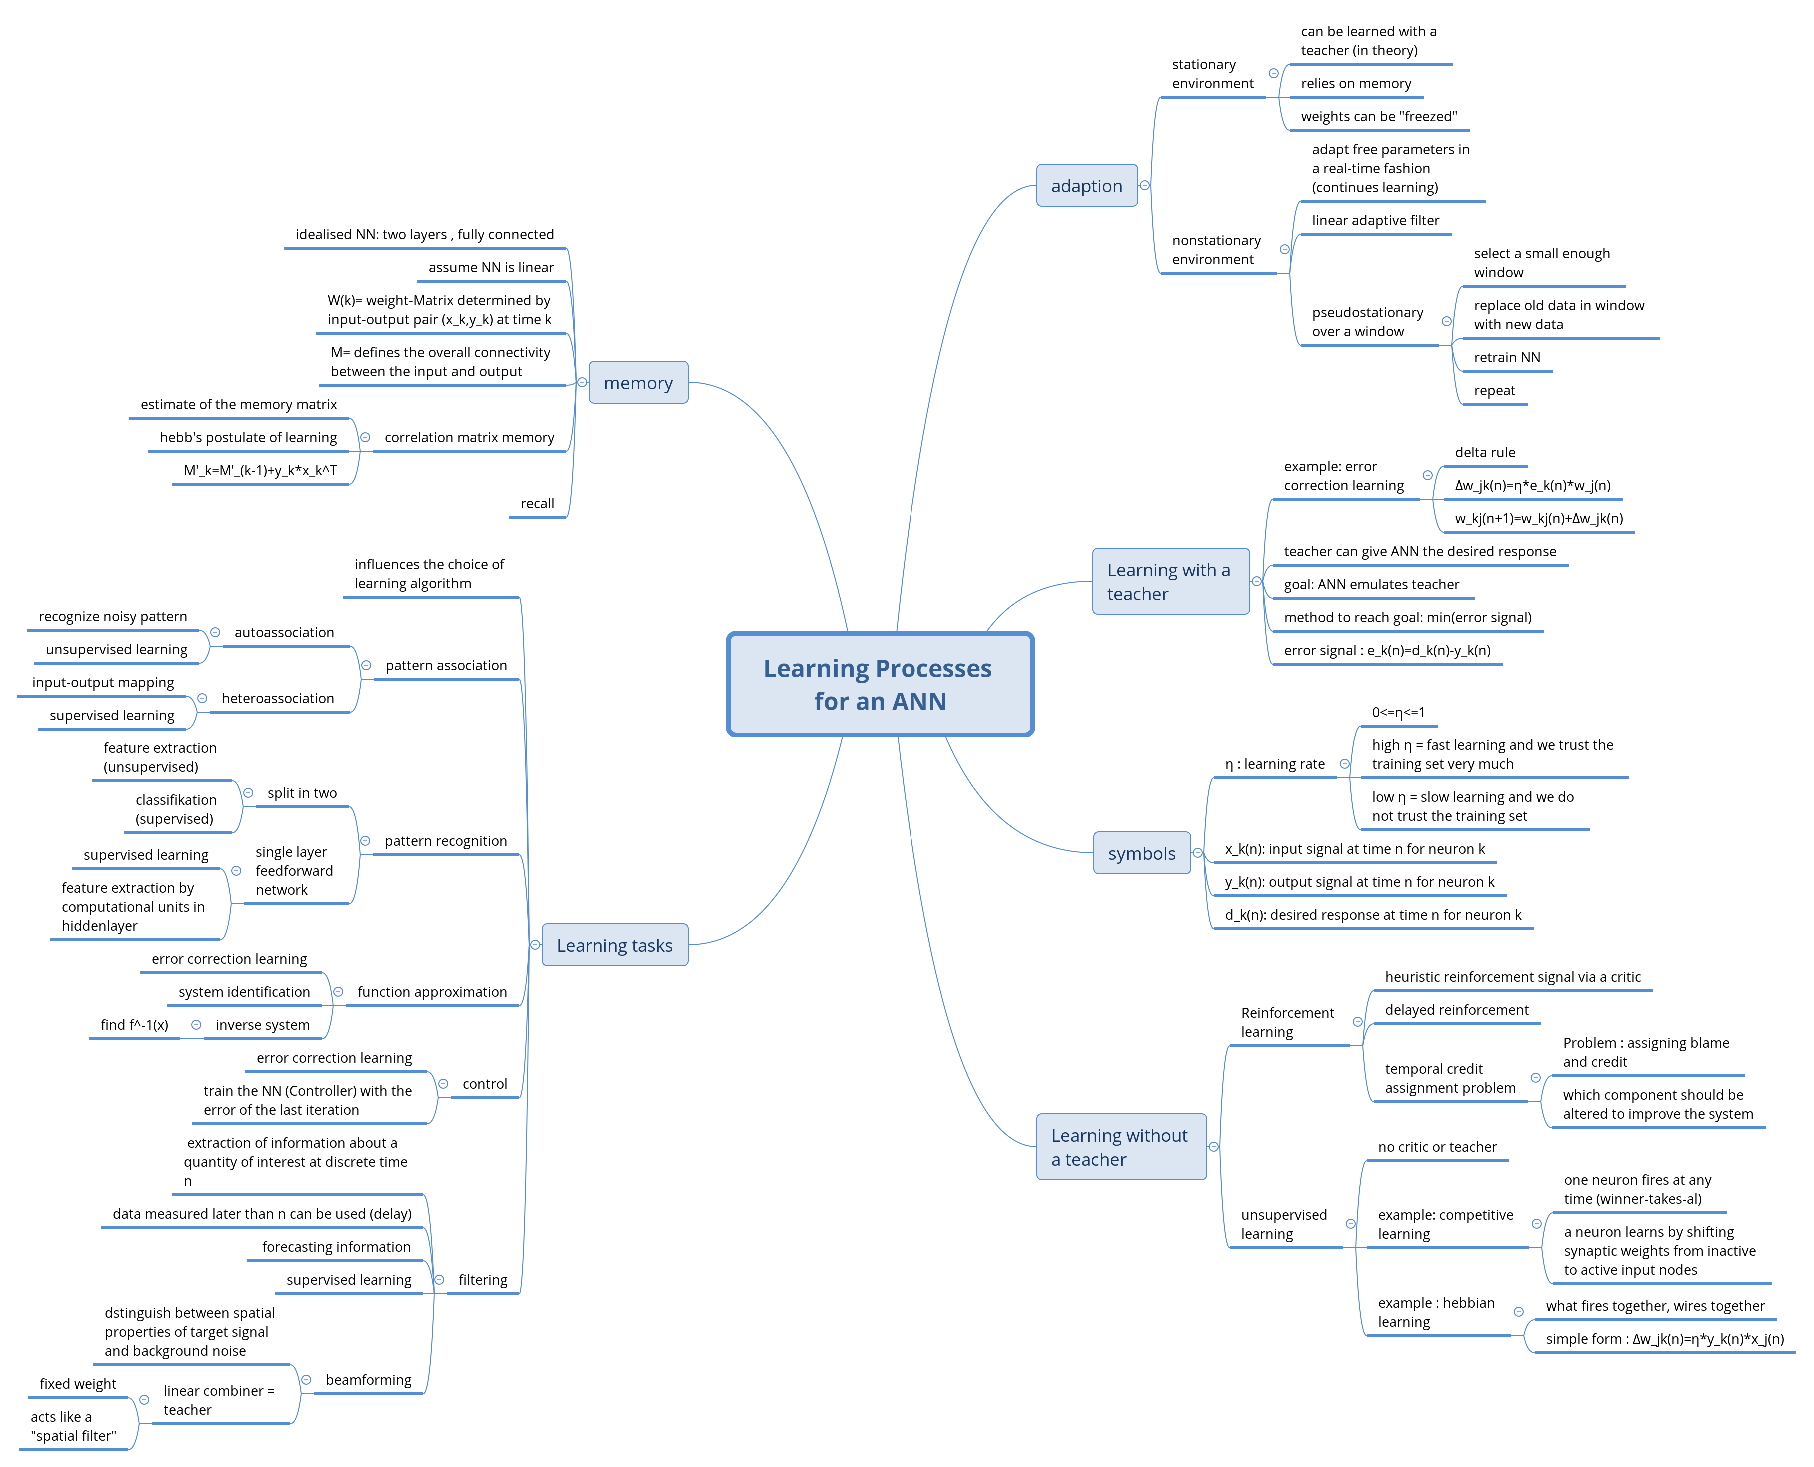

In [33]:
from IPython.display import Image
Image("ANN.png")

#  Aufgabe 1.13 

(a)

In [34]:
a, b = sp.symbols("a, b")

def phi(x):
    return 1 / (1 + sp.exp(-x))

In [35]:
a1 = a * 5 + b
b1 = -3 * b + 2 * a
a2 = phi(a1)
b2 = phi(b1)
a3 = 3 * a2 - b2
b3 = 6 * b2 + 4 * a2
a4 = phi(a3)
b4 = phi(b3)

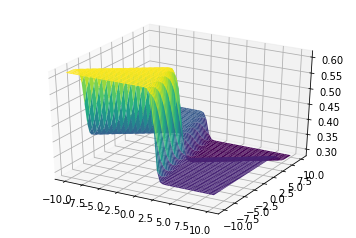

In [36]:
sp.plotting.plot3d(phi(-2 * a4 + b4))

In [37]:
def net(_a, _b):
    return phi(-2 * a4 + b4).subs(a, _a).subs(b, _b).evalf()

Assume the network is a binary-classifier:

In [38]:
values = np.zeros((400,3))
idx = 0
for x in range(-10, 10, 1):
    for y in range(-10, 10, 1):
        v=net(x,y)
        if(v>=0.5):
            c=1
        else:
            c=0
        values[idx] = np.array([x, y, c])
        idx = idx + 1

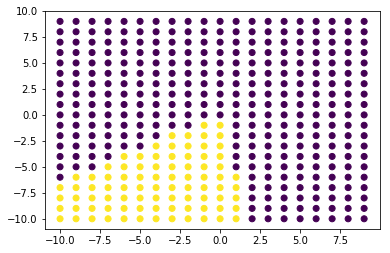

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(values[:,0], values[:,1], c=values[:,2])

b) 

Assume phi is linear:

In [40]:
def phi_lin(x):
    return x*10

In [41]:
a1 = a * 5 + b
b1 = -3 * b + 2 * a
a2 = phi_lin(a1)
b2 = phi_lin(b1)
a3 = 3 * a2 - b2
b3 = 6 * b2 + 4 * a2
a4 = phi_lin(a3)
b4 = phi_lin(b3)

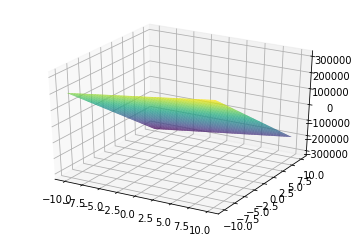

In [42]:
sp.plotting.plot3d(phi_lin(-2 * a4 + b4))

In [43]:
phi_lin(-2 * a4 + b4)

Assume the network is a binary-classifier:

In [44]:
def net_lin(_a, _b):
    return phi_lin(-2 * a4 + b4).subs(a, _a).subs(b, _b).evalf()

In [45]:
values_lin = np.zeros((400,3))
idx = 0
for x in range(-10, 10, 1):
    for y in range(-10, 10, 1):
        v=net_lin(x,y)
        if(v>=0):
            c=1
        else:
            c=0
        values_lin[idx] = np.array([x, y, c])
        idx = idx + 1

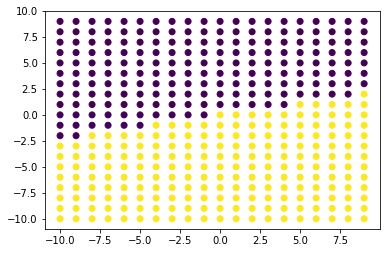

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(values_lin[:,0], values_lin[:,1], c=values_lin[:,2])

# Bias
Adjust the data at the "New Classification Example (now *with* bias)" slide, such that a bais becomes necessary (not 0). 

C1 = {(1,4), (1, 2), (0, 2)} 

C2 = {(-1,2), (-1,4), (0,4)} 

Trick for bias:

C1' = {(1,1,4), (1,1, 2), (1,0, 2)} 

C2' = {(1,-1,2), (1,-1,4), (1,0,4)} 

Replace tuples from C2':

C2' = {(-1,1,-2), (-1,1,-4), (-1,-0,-4)} 


w(1) = [1, 0, 0]T
η = 1

iteration 1:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) | (1, 0, 0) | 1 | No | (1, 0, 0)
(1, 1, 2) | (1, 0, 0) | 1 | No | (1, 0, 0)
(1, 0, 2) | (1, 0, 0) | 1 | No | (1, 0, 0)
(-1, 1, -2) | (1, 0, 0) | -1 | Yes | (0, 1, -2)
(-1, 1, -4) | (0, 1, -2) | 9 | No | (0, 1, -2)
(-1, 0, -4) | (0, 1, -2) | 8 | No | (0, 1, -2)

iteration 2:


Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) | (0, 1, -2) | -7 | Yes | (1, 2, 2)
(1, 1, 2) | (1, 2, 2) | 7 | No | (1, 2, 2)
(1, 0, 2) | (1, 2, 2) | 5 | No | (1, 2, 2)
(-1, 1, -2) | (1, 2, 2) | -3 | Yes | (0, 3, 0)
(-1, 1, -4) | (0, 3, 0) | 3 | No | (0, 3, 0)
(-1, 0, -4) | (0, 3, 0) | 0 | Yes | (-1, 3, -4)


iteration 3:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) | (-1, 3, -4) | -14 | Yes | (0, 4, 0)
(1, 1, 2) | (0, 4, 0) | 4 | No | (0, 4, 0)
(1, 0, 2) | (0, 4, 0) | 0 | Yes | (1, 4, 2)
(-1, 1, -2) | (1, 4, 2) | -1 | Yes | (0, 5, 0)
(-1, 1, -4) | (0, 5, 0) | 5 | No | (0, 5, 0)
(-1, 0, -4) | (0, 5, 0) | 0 | Yes | (-1, 5, -4)


iteration 4:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) | (-1, 5, -4) | -12 | Yes | (0, 6, 0)
(1, 1, 2) | (0, 6, 0) | 6 | No | (0, 6, 0)
(1, 0, 2) | (0, 6, 0) | 0 | Yes | (1, 6, 2)
(-1, 1, -2) | (1, 6, 2) | 1 | No | (1, 6, 2)
(-1, 1, -4) | (1, 6, 2) | -3 | Yes | (0, 7, -2)
(-1, 0, -4) | (0, 7, -2) | -8 | Yes | (-1, 7, -6)


iteration 5:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (-1, 7, -6) | -18 | Yes | (0,8,-2)
(1, 1, 2) | (0, 8, -2) | 4 | No | (0, 8, -2)
(1, 0, 2) | (0, 8, -2) | -4 | Yes | (1, 8, 0)
(-1, 1, -2) | (1, 8, 0) | 7 | No | (1, 8, 0)
(-1, 1, -4) | (1, 8, 0) | 7 | No | (1, 8, 0)
(-1, 0, -4) | (1, 8, 0) | -1 | Yes | (0, 8, -4)


iteration 6:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 8,-4)| -8 | Yes | (1,9,0)
(1, 1, 2) | (1, 9, 0) | 10 | No | (1, 9, 0)
(1, 0, 2) | (1, 9, 0) | 1 | No | (1, 9, 0)
(-1, 1, -2) | (1, 9, 0) | 8 | No | (1, 9, 0)
(-1, 1, -4) | (1, 9, 0) | 8 | No | (1, 9, 0)
(-1, 0, -4) | (1, 9, 0) | -1 |Yes | (0, 9, -4)


iteration 7:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 9,-4)| -7 | Yes | (1,10,0)
(1, 1, 2) | (1, 10, 0) | 11 | No | (1, 10, 0)
(1, 0, 2) | (1, 10, 0) | 1 | No | (1, 10, 0)
(-1, 1, -2) | (1, 10, 0) | 9 | No | (1, 10, 0)
(-1, 1, -4) | (1, 10, 0) | 9 | No | (1, 10, 0)
(-1, 0, -4) | (1, 10, 0) | -1 |Yes | (0, 10, -4)


iteration 8:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 10,-4)| -6 | Yes | (1,11,0)
(1, 1, 2) | (1, 11, 0) | 12 | No | (1, 11, 0)
(1, 0, 2) | (1, 11, 0) | 1 | No | (1, 11, 0)
(-1, 1, -2) | (1, 11, 0) | 10 | No | (1, 11, 0)
(-1, 1, -4) | (1, 11, 0) | 10 | No | (1, 11, 0)
(-1, 0, -4) | (1, 11, 0) | -1 |Yes | (0, 11, -4)


iteration 9:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 11,-4)| -5 | Yes | (1,12,0)
(1, 1, 2) | (1, 12, 0) | 13 | No | (1, 12, 0)
(1, 0, 2) | (1, 12, 0) | 1 | No | (1, 12, 0)
(-1, 1, -2) | (1, 12, 0) | 11 | No | (1, 12, 0)
(-1, 1, -4) | (1, 12, 0) | 11 | No | (1, 12, 0)
(-1, 0, -4) | (1, 12, 0) | -1 |Yes | (0, 12, -4)


iteration 10:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 12,-4)| -4 | Yes | (1,13,0)
(1, 1, 2) | (1, 13, 0) | 14 | No | (1, 13, 0)
(1, 0, 2) | (1, 13, 0) | 1 | No | (1, 13, 0)
(-1, 1, -2) | (1, 13, 0) | 12 | No | (1, 13, 0)
(-1, 1, -4) | (1, 13, 0) | 12 | No | (1, 13, 0)
(-1, 0, -4) | (1, 13, 0) | -1 |Yes | (0, 13, -4)


iteration 11:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 13,-4) | -3 | Yes | (1,14,0)
(1, 1, 2) | (1, 14, 0) | 15 | No | (1, 14, 0)
(1, 0, 2) | (1, 14, 0) | 1 | No | (1, 14, 0)
(-1, 1, -2) | (1, 14, 0) | 13 | No | (1, 14, 0)
(-1, 1, -4) | (1, 14, 0) | 13 | No | (1, 14, 0)
(-1, 0, -4) | (1, 14, 0) | -1 |Yes | (0, 14, -4)

iteration 12:


Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 14,-4) | -2 | Yes | (1,15,0)
(1, 1, 2) | (1, 15, 0) | 16 | No | (1, 15, 0)
(1, 0, 2) | (1, 15, 0) | 1 | No | (1, 15, 0)
(-1, 1, -2) | (1, 15, 0) | 14 | No | (1, 15, 0)
(-1, 1, -4) | (1, 15, 0) | 14 | No | (1, 15, 0)
(-1, 0, -4) | (1, 15, 0) | -1 |Yes | (0, 15, -4)


iteration 13:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 15,-4) | -1 | Yes | (1,16,0)
(1, 1, 2) | (1, 16, 0) | 17 | No | (1, 16, 0)
(1, 0, 2) | (1, 16, 0) | 1 | No | (1, 16, 0)
(-1, 1, -2) | (1, 16, 0) | 15 | No | (1, 16, 0)
(-1, 1, -4) | (1, 16, 0) | 15 | No | (1, 16, 0)
(-1, 0, -4) | (1, 16, 0) | -1 |Yes | (0, 16, -4)


iteration 14:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 16,-4) | 0 | Yes | (1,17,0)
(1, 1, 2) | (1, 17, 0) | 18 | No | (1, 17, 0)
(1, 0, 2) | (1, 17, 0) | 1 | No | (1, 17, 0)
(-1, 1, -2) | (1, 17, 0) | 16 | No | (1, 17, 0)
(-1, 1, -4) | (1, 17, 0) | 16 | No | (1, 17, 0)
(-1, 0, -4) | (1, 17, 0) | -1 |Yes | (0, 17, -4)


iteration 15:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (0, 17,-4) | 1 | No | (0,17,-4)
(1, 1, 2) | (0, 17, -4) | 9 | No | (0, 17, -4)
(1, 0, 2) | (0, 17, -4) | -8 | Yes | (1, 17, -2)
(-1, 1, -2) | (1, 17, -2) | 20 | No | (1, 17, -2)
(-1, 1, -4) | (1, 17, -2) | 24 | No | (1, 17, -2)
(-1, 0, -4) | (1, 17, -2) | 7 | No | (1, 17, -2)


iteration 16:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (1, 17, -2)| 10 | No | (1,17,-2)
(1, 1, 2) | (1, 17, -2) | 14 | No | (1, 17, -2)
(1, 0, 2) | (1, 17, -2) | -3 | Yes | (2, 17, 0)
(-1, 1, -2) | (2, 17, 0) | 15 | No | (2, 17, 0)
(-1, 1, -4) | (2, 17, 0) | 15 | No | (2, 17, 0)
(-1, 0, -4) | (2, 17, 0) | -2 | Yes | (1, 17, -4)


iteration 17:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (1, 17, -4)| 2 | No | (1,17,-4)
(1, 1, 2) | (1, 17, -4) | 10 | No | (1, 17, -4)
(1, 0, 2) | (1, 17, -4) | -7 | Yes | (2, 17, -2)
(-1, 1, -2) | (2, 17, -2) | 11 | No | (2, 17, -2)
(-1, 1, -4) | (2, 17, -2) | 7 | No | (2, 17, -2)
(-1, 0, -4) | (2, 17, -2) | 6 | No | (2, 17, -2)


iteration 18:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (2, 17, -2)| 11 | No | (2,17,-2)
(1, 1, 2) | (2, 17, -2) | 15 | No | (2, 17, -2)
(1, 0, 2) | (2, 17, -2) | -2 | Yes | (3, 17, 0)
(-1, 1, -2) | (3, 17, 0) | 14 | No | (3, 17, 0)
(-1, 1, -4) | (3, 17, 0) | 14 | No | (3, 17, 0)
(-1, 0, -4) | (3, 17, 0) | -3 | Yes | (2, 17, -4)


iteration 19:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (2, 17, -4)| 3 | No | (2,17,-4)
(1, 1, 2) | (2, 17, -4) | 11 | No | (2, 17, -4)
(1, 0, 2) | (2, 17, -4) | -6 | Yes | (3, 17, -2)
(-1, 1, -2) | (3, 17, -2) | 18 | No | (3, 17, -2)
(-1, 1, -4) | (3, 17, -2) | 14 | No | (3, 17, -2)
(-1, 0, -4) | (3, 17, -2) | 5 | No | (3, 17, -2)


iteration 20:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (3, 17, -2)| 13 | No | (3, 17,-2)
(1, 1, 2) | (3, 17, -2) | 16 | No | (3, 17, -2)
(1, 0, 2) | (3, 17, -2) | -1 | Yes | (4, 17, 0)
(-1, 1, -2) | (4, 17, 0) | 13 | No | (4, 17, 0)
(-1, 1, -4) | (4, 17, 0) | 13 | No | (4, 17, 0)
(-1, 0, -4) | (4, 17, 0) | -4 | Yes | (3, 17, -4)

iteration 21:


Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (3, 17, -4)| 4 | No | (3, 17,-4)
(1, 1, 2) | (3, 17, -4) | 12 | No | (3, 17, -4)
(1, 0, 2) | (3, 17, -4) | -5 | Yes | (4, 17, -2)
(-1, 1, -2) | (4, 17, -2) | 9 | No | (4, 17, -2)
(-1, 1, -4) | (4, 17, -2) | 5 | No | (4, 17, -2)
(-1, 0, -4) | (4, 17, -2) | 4 | No | (4, 17, -2)

iteration 22:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (4, 17, -2)| 14 | No | (4, 17, -2)
(1, 1, 2) | (4, 17, -2) | 17 | No | (4, 17, -2)
(1, 0, 2) | (4, 17, -2) | 0 | Yes | (5, 17, 0)
(-1, 1, -2) | (5, 17, 0) | 12 | No | (5, 17, 0)
(-1, 1, -4) | (5, 17, 0) | 12 | No | (5, 17, 0)
(-1, 0, -4) | (5, 17, 0) | -5 | Yes | (4, 17, -4)

iteration 23:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (4, 17, -4)| 5 | No | (4, 17, -4)
(1, 1, 2) | (4, 17, -4) | 13 | No | (4, 17, -4)
(1, 0, 2) | (4, 17, -4) | -4 | Yes | (5, 17, -2)
(-1, 1, -2) | (5, 17, -2) | 16 | No | (5, 17, -2)
(-1, 1, -4) | (5, 17, -2) | 20 | No | (5, 17, -2)
(-1, 0, -4) | (5, 17, -2) | 3 | No | (5, 17, -2)


iteration 24:

Adjusted pattern | Weight applied | w(n)x(n) | Update? | New weight
- | - | - | - | -
(1, 1, 4) |  (5, 17, -2)| 15 | No | (5, 17, -2)
(1, 1, 2) | (5, 17, -2) | 18 | No | (5, 17, -2)
(1, 0, 2) | (5, 17, -2) | 1 | No | (5, 17, -2)
(-1, 1, -2) | (5, 17, -2) | 16 | No | (5, 17, -2)
(-1, 1, -4) | (5, 17, -2) | 20 | No | (5, 17, -2)
(-1, 0, -4) | (5, 17, -2) | 3 | No | (5, 17, -2)


function : 17*x1-2*x2+5